## Extractive Text Summarization using NLP

#### Think Data, Think Different

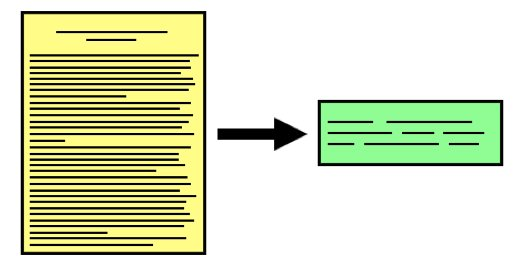

#### By Md Saif Ali in Extractive Text Summarizer, NLP, Python

## What is NLP?

In a simpler way, imagine when you are working on building a model, you would have data set mostly with numeric values, this is convenient both for you as well as the computer to process and analyse the data. but what if we end up having a text data in our data set. as humans we have the ability to extract information from text on the other hand, a computer needs special processing technique to extract information from text data.

Some examples of application of NLP are :

– Classification of Email as legitimate or spam

– Sentiment analysis of review

– Summarization of text articles and more.

### What is Extractive Text Summarization?

Text summarization is the process of creating a short and coherent version of a longer document. The ideal of Extractive text summarization is to develop technique by which important information or sentence are extracted from the given text file.

#### Things to know :

### NLTK :

Natural language toolkit is the most popular library for natural language processing. It was written in Python and has a big community behind it. NLTK is the easiest natural language processing (NLP) library that is available.

### Tokenization :

Tokenization is the process by which big quantity of text is divided into smaller parts called tokens. These tokens are very useful for finding such patterns as well as is considered as a base step for stemming and lemmatization.

## Stemming & Lemmatization

Stemming just removes or stems the last few characters of a word, often leading to incorrect meanings and spelling. Lemmatization considers the context and converts the word to its meaningful base form, which is called Lemma. Sometimes, the same word can have multiple different Lemmas.

Here are the examples to illustrate all the differences and use cases:

1. If you lemmatize the word 'Caring', it would return 'Care'. If you stem, it would return 'Car' and this is erroneous.

2. If you lemmatize the word 'Stripes' in verb context, it would return 'Strip'. If you lemmatize it in noun context, it would return 'Stripe'. If you just stem it, it would just return 'Strip'.

3. You would get same results whether you lemmatize or stem words such as walking, running, swimming... to walk, run, swim etc.

4. Lemmatization is computationally expensive since it involves look-up tables and what not. If you have large dataset and performance is an issue, go with Stemming. Remember you can also add your own rules to Stemming. If accuracy is paramount and dataset isn't humongous, go with Lemmatization.

### Sentence Tokenization :

Sentence Tokenization is a sub module of tokenization, which splits the article to be summarized into sentences.

### Stopwords :

A stop word is a commonly used word (such as “the”, “a”, “an”, “in”) that take up space in our database, or take up valuable processing time. For this, we can remove them easily, by storing a list of words that you consider to stop words.

### Cosine similarity :

It is a measure of similarity between two non-zero vectors of an inner product space that measures the cosine of the angle between them. Since we will be representing our sentences as the bunch of vectors, we can use it to find the similarity among sentences. Its measures cosine of the angle between vectors. Angle will be 0 if sentences are similar.

### Similarity matrix :

A similarity matrix is a matrix of scores which express the similarity between two sentences. 

# Getting Started :

Import these packages.

In [1]:
import numpy as np
import pandas as pd
from nltk.cluster.util import cosine_distance
from nltk.corpus import stopwords
import networkx as nx
from string import punctuation
import nltk
nltk.download('stopwords')
import io

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\asus\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\stopwords.zip.


### we are building a single callable function for the process of text summarization.

In [2]:
def data_summary(data,top_n):
    stop_words = set(stopwords.words("english"))
    summary=[]
    for X in data:

        #----------------------------------------------------
        #reading sentence
        
        article = nltk.tokenize.sent_tokenize(X)
        sentences = []
        
        for sent in article:

            sentences.append(sent.replace("[^a-zA-Z]", " ").split(" "))
        sentences.pop() 
        
        #print(sentences)
        #----------------------------------------------------
        #sentence similarity

        def sentence_similarity(sent1, sent2, stopwords=None):
            if stopwords is None:
                stopwords = []

            sent1 = [w.lower() for w in sent1]
            sent2 = [w.lower() for w in sent2]
            #print(sent1,sent2)
            all_words = list(set(sent1 + sent2))

            vector1 = [0] * len(all_words)
            vector2 = [0] * len(all_words)

            # build the vector for the first sentence
            for w in sent1:
                if w in stopwords:
                    continue
                vector1[all_words.index(w)] += 1

            # build the vector for the second sentence
            for w in sent2:
                if w in stopwords:
                    continue
                vector2[all_words.index(w)] += 1
            #print(all_words)
            #print(len(all_words))
            return 1 - cosine_distance(vector1, vector2)

        #print("sentence_similarity :",sentence_similarity,'\n','-'*50)
            

        #-----------------------------------------------------------------------------
        #similarity matrix

        similarity_matrix = np.zeros((len(sentences), len(sentences)))
        for idx1 in range(len(sentences)):
                for idx2 in range(len(sentences)):
                    if idx1 == idx2: #ignore if both are same sentences
                        continue 
                    similarity_matrix[idx1][idx2] = sentence_similarity(sentences[idx1], sentences[idx2], stop_words)


        #print("similarity matrix :\n",similarity_matrix,'\n','-'*50)

        #------------------------------------------------------------------------------
        #ranking sentence 

        sentence_similarity_graph = nx.from_numpy_array(similarity_matrix)
        scores = nx.pagerank(sentence_similarity_graph)
        ranked_sentence = sorted(((scores[i],s) for i,s in enumerate(sentences)), reverse=True) 
        #print("ranked_sentence :",ranked_sentence,'\n','-'*50)

        #--------------------------------------------------------------------------------
        #summarize text
        summarize_text = []


        #top_n = 15
        for i in range(top_n):
            if X != '-' :
                summarize_text.append(" ".join(ranked_sentence[i][1]))
            else :
                summarize_text.append('-')
        #print("Summarize Text: \n", ". ".join(summarize_text))
        #print('-'*110)

        summary.append(". ".join(summarize_text))
    
    return summary

In [5]:
Article = '''Data science and big data are often viewed in concert, but data science can be 
used to extract value from data of all sizes, whether structured, unstructured, or 
semi-structured. Of course, big data is useful to data scientists in many cases, because the 
more data you have, the more parameters you can include in a given model.


"With big data, you're not necessarily bound to the dimensionality constraints of 
small data," Hunt says. "Big data does help in certain aspects, but more isn't always 
better. If you take the stock market and try to fit it to a line, it's not going to work. 
But maybe, if you only look at it for a day or two, you can set it to a line."'''

In [6]:
Article_summary = data_summary(pd.Series([Article]),3)
Article_summary

['Data science and big data are often viewed in concert, but data science can be \nused to extract value from data of all sizes, whether structured, unstructured, or \nsemi-structured.. Of course, big data is useful to data scientists in many cases, because the \nmore data you have, the more parameters you can include in a given model.. "Big data does help in certain aspects, but more isn\'t always \nbetter.']

# A walk through the code

[Input article → split into sentences → remove stop words → build a similarity matrix → generate rank based on matrix → pick top N sentences for summary]

Let us take a small article to work with.

## Article

'''Data science and big data are often viewed in concert, but data science can be used to extract value from data of all sizes, whether structured, unstructured, or semi-structured. Of course, big data is useful to data scientists in many cases, because the more data you have, the more parameters you can include in a given model.
"With big data, you're not necessarily bound to the dimensionality constraints of small data," Hunt says. "Big data does help in certain aspects, but more isn't always better. If you take the stock market and try to fit it to a line, it's not going to work. But maybe, if you only look at it for a day or two, you can set it to a line."'''

#### Initially, the summarizer function takes in the article and the number of output sentences as input in the form user. the article is then broken down into sentences by the sentence tokienizer. These sentences are cleaned and stored as a list.

#### The next step is to create a similarity matrix between the sentences after removal of stopwords. The Cosine distance is used to find the similarity and a matrix is created.

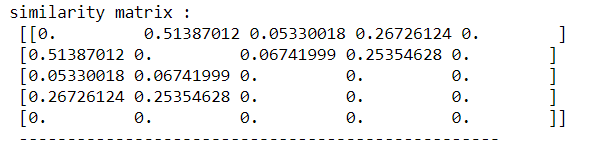

#### In the next step we rank each sentence based on the similarity.

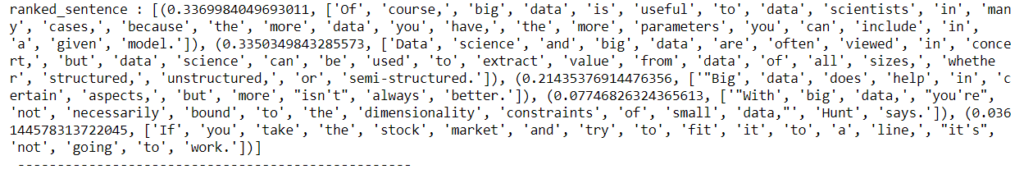

#### Finally, we sort the sentences based on ranked value and print the number of sentence requested by the user in the summarizer function.

Summary of the Article

'Of course, big data is useful to data scientists in many cases, because the more data you have, the more parameters you can include in a given model.. Data science and big data are often viewed in concert, but data science can be used to extract value from data of all sizes, whether structured, unstructured, or semi-structured.'